In [ ]:
import os
import pandas as pd

# Obtención de datos 

Se genera una función que itere sobre toda la carpeta y extraíga los datos agregados de los archivos .time y .dat y que retorne un dataframe por carpeta, además, se le asigna una etiqueta clase y subclase dependiendo de donde esté ubicada

In [25]:

def process_files_in_directory(directory_path,subclase,clase):
    data_list_time = []
    data_list_dat = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".time"):
            data_set_1 = []

            with open(os.path.join(directory_path, filename), "r") as file:
                lines = file.readlines()
                for line in lines:
                    values = line.strip().split()
                    if len(values) == 10:
                        data_set_1.extend(values[1:])
            data_list_time.append(data_set_1)

        elif filename.endswith(".dat"):
            data_set_2 = []

            with open(os.path.join(directory_path, filename), "r") as file:
                lines = file.readlines()
                for line in lines[1:]:
                    values = line.strip().split()
                    if len(values) == 1:
                        data_set_2 = values

           
            data_list_dat.append(data_set_2[0])

    combined_data = []

    if len(data_list_time) == len(data_list_dat):
        for i in range(len(data_list_time)):
            combined_data.append(data_list_time[i] + [data_list_dat[i], subclase,clase])
    else:
        print("Las listas no tienen la misma longitud.")

    df = pd.DataFrame(combined_data)

    return df


In [26]:
#EJEMPLO 
IO_30 = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\1O_3O", "1O_3O","CEPH")
IO_30

,0,1,2,3,4,5,6,7,8,9,10,11
0,lm0184n13033,17.287,0.096,965.90,1148.55,17.492,0.130,924.30,1184.85,0.571117,1O_3O,CEPH
1,lm0295m15815,16.739,0.033,438.27,942.06,17.008,0.046,395.23,970.85,0.528350,1O_3O,CEPH


Se aplica la función carpeta por carpeta y se junta en un gran dataframe:

In [27]:
#RRL

RRab = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\RRL\\RRab", "RRab","RRL")
RRc  = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\RRL\\RRc", "RRc","RRL")
RRd  = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\RRL\\RRd", "RRd","RRL")
RRe  = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\RRL\\RRe", "RRe","RRL")


# CEPH
IO = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\1O", "1O","CEPH")
IO_30 = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\1O_3O", "1O_3O","CEPH")
IO_20 = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\1O_3O", "1O_2O","CEPH")
IO_20_3O = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\1O_20_3O", "1O_20_3O","CEPH")
IIO = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\2O", "2O","CEPH")
F = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\F", "F","CEPH")
F_10 = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\F_10", "F_10","CEPH")
F_10_20 = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\CEPH\\F_10_20", "F_10_20","CEPH")

#EB

EC = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\EC", "EC","EB")
ED = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ED", "ED","EB")
ED_ESD = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ED_ESD", "ED_ESD","EB")
ED_TEB= process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ED_TEB", "ED_TEB","EB")
ED_VAR = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ED_VAR", "ED_VAR","EB")
ELL_EC = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ELL_EC", "ELL_EC","EB")
ESD = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ESD", "ESD","EB")
ESD_DPV = process_files_in_directory("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\ogle_ceph_eb\\EB\\ESD_DPV", "ESD_DPV","EB")



dataframes = [IO, IO_30, IO_20, IO_20_3O, IIO, F, F_10, F_10_20, EC, ED, ED_ESD, ED_TEB, ED_VAR, ELL_EC, ESD, ESD_DPV, RRab, RRc, RRd, RRe]


# Concatena los DataFrames en un gran DataFrame
Data = pd.concat(dataframes, ignore_index=True)
Data.columns = ["erosid", "MagR", "ErrMR", "XR", "YR", "MagB", "ErrMB", "XB", "YB", "Period", "Subclass", "Class"]

print(Data)


             erosid    MagR  ErrMR       XR       YR    MagB  ErrMB       XB  \
0      lm0010k11782  16.796  0.067   241.97  1112.65  16.960  0.087   186.78   
1      lm0010k17018  16.920  0.075   250.93   813.94  17.111  0.098   196.22   
2      lm0010l15466  14.479  0.066  1379.05   925.77  14.828  0.096  1326.29   
3      lm0010l22132  15.095  0.084   286.29   528.69  15.224  0.102   234.27   
4      lm0010l26829  14.615  0.085  1145.43   291.73  14.866  0.118  1093.61   
...             ...     ...    ...      ...      ...     ...    ...      ...   
28435  lm0743k14873  19.572  0.240   803.83   993.52  19.505  0.190   753.87   
28436  lm0743n20115  19.654  0.156   345.48   496.65  19.659  0.105   298.35   
28437   lm0744n6839  19.258  0.139  1495.25  1471.21  19.431  0.160  1453.02   
28438  lm0750n14226  19.098  0.115  1020.95   179.13  19.312  0.088   969.33   
28439  lm0750n15497  20.283  0.628   934.00   847.29  20.123  0.441   881.28   

            YB    Period Subclass Class

Se descarga como csv, para no reiterar el proceso 

In [ ]:
Data.to_csv('Data.csv', index=True)

# Cargamos los datos 

Se cargan los datos previamente descargados como csv para no tener que reitar el proceso de obtención

In [4]:


# Guardar el DataFrame en un archivo CSV
Data = pd.read_csv("C:\\Users\\maxit\\OneDrive\\Escritorio\\Base de datos IC\\Data.csv")

Data

,erosid,MagR,ErrMR,XR,YR,MagB,ErrMB,XB,YB,Period,Subclass,Class
0,lm0010k11782,16.796,0.067,241.97,1112.65,16.960,0.087,186.78,1154.41,0.819635,1O,CEPH
1,lm0010k17018,16.920,0.075,250.93,813.94,17.111,0.098,196.22,856.02,0.628646,1O,CEPH
2,lm0010l15466,14.479,0.066,1379.05,925.77,14.828,0.096,1326.29,970.50,4.323566,1O,CEPH
3,lm0010l22132,15.095,0.084,286.29,528.69,15.224,0.102,234.27,571.99,2.372699,1O,CEPH
4,lm0010l26829,14.615,0.085,1145.43,291.73,14.866,0.118,1093.61,336.19,3.088107,1O,CEPH
...,...,...,...,...,...,...,...,...,...,...,...,...
28435,lm0743k14873,19.572,0.240,803.83,993.52,19.505,0.190,753.87,1025.54,0.371310,RRe,RRL
28436,lm0743n20115,19.654,0.156,345.48,496.65,19.659,0.105,298.35,525.71,0.476086,RRe,RRL
28437,lm0744n6839,19.258,0.139,1495.25,1471.21,19.431,0.160,1453.02,1508.82,0.380544,RRe,RRL
28438,lm0750n14226,19.098,0.115,1020.95,179.13,19.312,0.088,969.33,221.74,0.358460,RRe,RRL


Se aplica el algorítmo random forest para la base de datos 

         MagR  ErrMR    MagB  ErrMB    Period
0      16.796  0.067  16.960  0.087  0.819635
1      16.920  0.075  17.111  0.098  0.628646
2      14.479  0.066  14.828  0.096  4.323566
3      15.095  0.084  15.224  0.102  2.372699
4      14.615  0.085  14.866  0.118  3.088107
...       ...    ...     ...    ...       ...
28435  19.572  0.240  19.505  0.190  0.371310
28436  19.654  0.156  19.659  0.105  0.476086
28437  19.258  0.139  19.431  0.160  0.380544
28438  19.098  0.115  19.312  0.088  0.358460
28439  20.283  0.628  20.123  0.441  0.387339

[28440 rows x 5 columns]
0        CEPH
1        CEPH
2        CEPH
3        CEPH
4        CEPH
         ... 
28435     RRL
28436     RRL
28437     RRL
28438     RRL
28439     RRL
Name: Class, Length: 28440, dtype: object
Precisión del modelo: 95.60%
Matriz de Confusión:
[[0.94081633 0.04081633 0.01836735]
 [0.00537634 0.92688172 0.06774194]
 [0.         0.02546435 0.97453565]]

Informe de Métricas:
              precision    recall  f1-score  

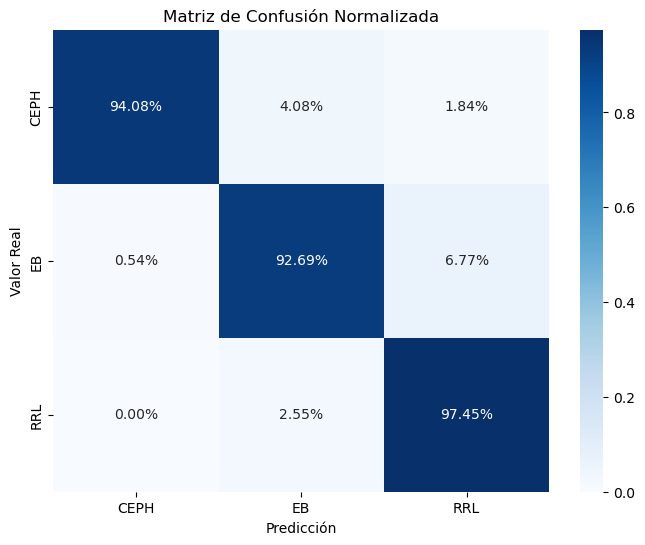

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

features = Data.drop(columns=["erosid","Subclass", "Class","XR","YR","XB","YB"])
print(features)
target = Data["Class"]
print(target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100,criterion= "entropy", max_depth= 100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred, normalize='true')

# Generar el informe de métricas
classification_rep = classification_report(y_test, y_pred, target_names=Data["Class"].unique())

# Imprimir la matriz de confusión y el informe de métricas
print("Matriz de Confusión:")
print(confusion)

print("\nInforme de Métricas:")
print(classification_rep)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt=".2%", cmap="Blues", xticklabels=Data["Class"].unique(), yticklabels=Data["Class"].unique())
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión Normalizada")
plt.show()
